# Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
x = df.iloc[:, 2:4].values
y = df.iloc[:, -1].values

In [5]:
x.shape, y.shape

((400, 2), (400,))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
preds = model.predict(x_test)

In [10]:
model.score(x_test, y_test)

0.82

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

In [13]:
cm = confusion_matrix(y_test, preds)
print(confusion_matrix(y_test, preds))

[[60  5]
 [13 22]]


In [14]:
import seaborn as sns

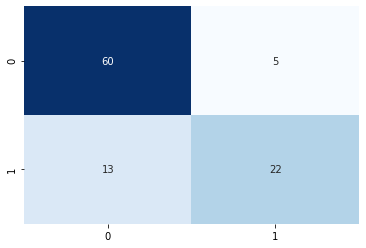

In [21]:
sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


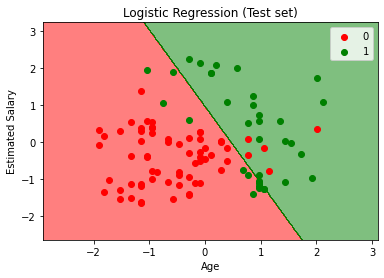

In [46]:
from matplotlib.colors import ListedColormap
x1, x2 = np.meshgrid(np.arange(start = x_train[:, 0].min() -1, stop = x_train[:, 0].max() +1, step =.01),
                     np.arange(start = x_train[:, 1].min() -1, stop = x_train[:, 1].max() +1, step =.01))
plt.contourf(x1, x2, model.predict((np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_train)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


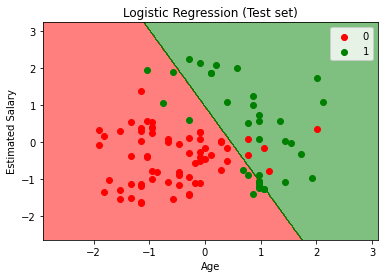

In [49]:
from matplotlib.colors import ListedColormap
x1, x2 = np.meshgrid(np.arange(start = x_test[:, 0].min() -1, stop = x_test[:, 0].max() +1, step =.01),
                     np.arange(start = x_test[:, 1].min() -1, stop = x_test[:, 1].max() +1, step =.01))
plt.contourf(x1, x2, model.predict((np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
            alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [50]:
import seaborn as sns

<AxesSubplot:>

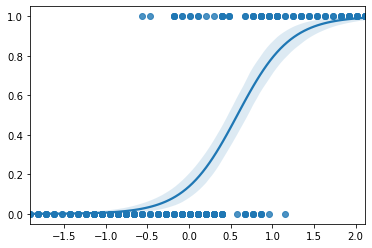

In [56]:
sns.regplot(x = x_train[:, 0], y = model.predict(x_train), logistic = True)

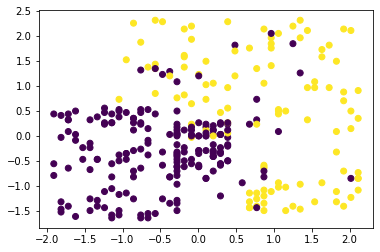

In [59]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

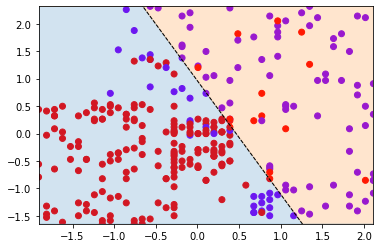

In [79]:
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap="rainbow_r")
# Plot the data and the classification with the decision boundary.
xmin, xmax = x_train[:,0].min(), x_train[:,0].max()
ymin, ymax = x_train[:,1].min(), x_train[:,1].max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()

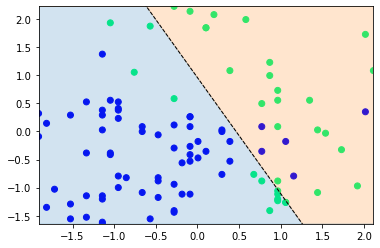

In [91]:
b = model.intercept_[0]
w1, w2 = model.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap="winter")
# Plot the data and the classification with the decision boundary.
xmin, xmax = x_test[:,0].min(), x_test[:,0].max()
ymin, ymax = x_test[:,1].min(), x_test[:,1].max()
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.show()